In [43]:
import numpy as np 
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

# EDA

In [4]:
df_train = pd.read_csv('spaceship-titanic/train.csv')

df_test = pd.read_csv('spaceship-titanic/test.csv')

In [5]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df_train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [9]:
print('<------Missing Values------>') # Checking for missing values in the training data
print(df_train.isnull().sum())
print("")
print('<------Missing Values----->') # Checking for missing values in the testing data
print(df_test.isnull().sum())

<------Missing Values------>
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<------Missing Values----->
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [10]:
df_test['Cabin'].value_counts()

Cabin
G/160/P     8
D/273/S     7
B/31/P      7
G/748/S     7
E/228/S     7
           ..
E/236/S     1
F/650/S     1
G/566/P     1
G/557/S     1
G/1498/S    1
Name: count, Length: 3265, dtype: int64

In [11]:
df_train.set_index('PassengerId', inplace=True)

df_test.set_index('PassengerId', inplace=True)

In [16]:
# Replacing Null Values
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())  # Replacing null Age with median value
df_test['Age'] = df_test['Age'].fillna(df_train['Age'].median())  # Replacing null Age in test set with median value from train

df_train['HomePlanet'] = df_train['HomePlanet'].fillna('Mars')  # Replacing null HomePlanet with 'Mars'
df_test['HomePlanet'] = df_test['HomePlanet'].fillna('Mars')  # Replacing null HomePlanet in test set with 'Mars'

df_train['CryoSleep'] = df_train['CryoSleep'].fillna(False)  # Replacing null CryoSleep with False
df_test['CryoSleep'] = df_test['CryoSleep'].fillna(False)  # Replacing null CryoSleep in test set with False

df_train['Cabin'] = df_train['Cabin'].fillna('T/0/P')  # Replacing null Cabin with 'T/0/P'
df_test['Cabin'] = df_test['Cabin'].fillna('T/0/P')  # Replacing null Cabin in test set with 'T/O/P'

df_train['VIP'] = df_train['VIP'].fillna('False')  # Replacing null VIP with 'False'
df_test['VIP'] = df_test['VIP'].fillna('False')  # Replacing null VIP in test set with 'False'

df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)  # Replacing null values in service columns with 0
df_test[['RoomService','FoodCourt','ShoppingMall', 'Spa', 'VRDeck']] = df_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)  # Replacing null values in test set

df_train['Destination'] = df_train['Destination'].fillna('TRAPPIST-1e')  # Replacing null Destination with 'TRAPPIST-1e'
df_test['Destination'] = df_test['Destination'].fillna('TRAPPIST-1e')  # Replacing null Destination in test set with 'TRAPPIST-1e'

In [19]:
df_train.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [20]:
df_test.isnull().sum()

HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

# Data Visualization

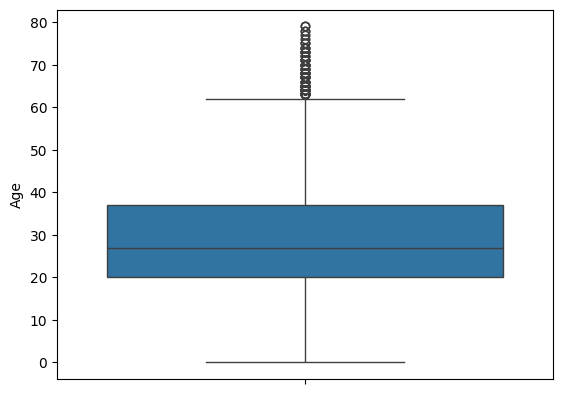

In [21]:
sns.boxplot(df_train['Age'])
plt.show()

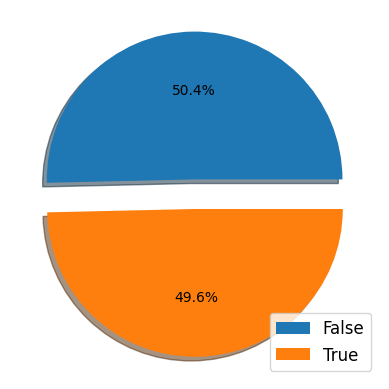

In [22]:
# Pie Chart Visualization
plt.pie(df_train.Transported.value_counts(), shadow=True, explode=[.1,.1], autopct='%.1f%%')
plt.legend(['False', 'True'], loc='best', fontsize=12)

<Axes: xlabel='HomePlanet', ylabel='count'>

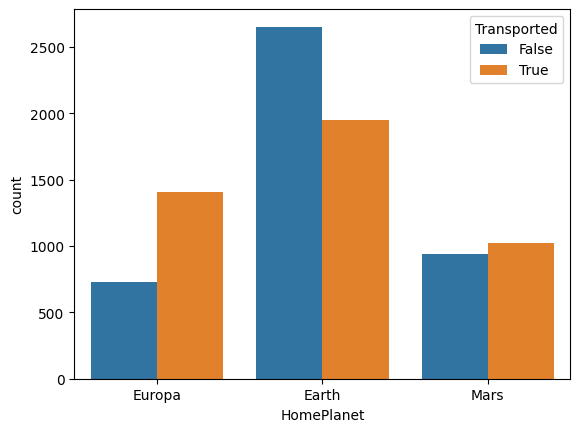

In [23]:
sns.countplot(x='HomePlanet', hue='Transported', data=df_train)

<Axes: xlabel='Destination', ylabel='count'>

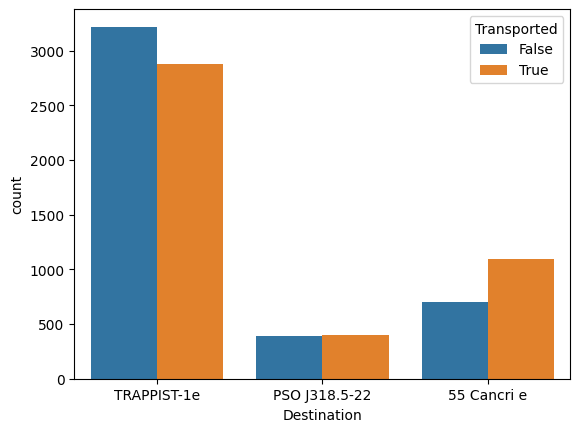

In [24]:
# Countplot Visualization
sns.countplot(x='Destination', hue='Transported', data=df_train)

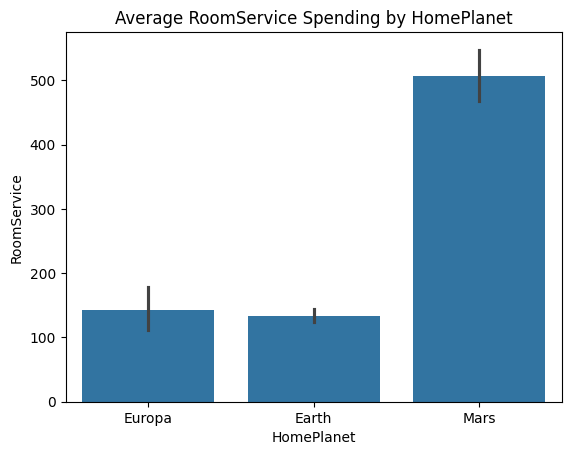

In [25]:
# Barplot Visualization
sns.barplot(x='HomePlanet', y='RoomService', data=df_train)
plt.title('Average RoomService Spending by HomePlanet')
plt.show()

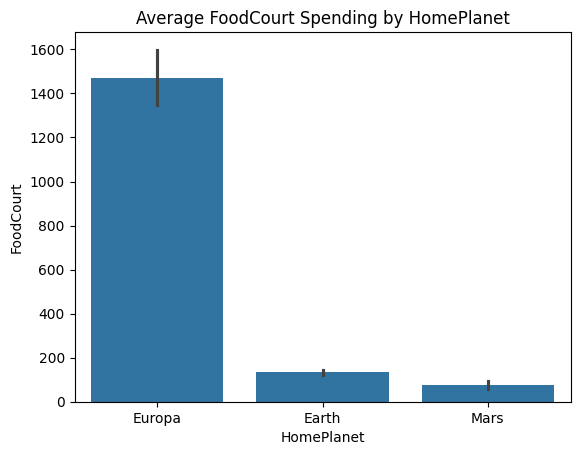

In [28]:
# Barplot Visualization
sns.barplot(x='HomePlanet', y='FoodCourt', data=df_train)
plt.title('Average FoodCourt Spending by HomePlanet')
plt.show()

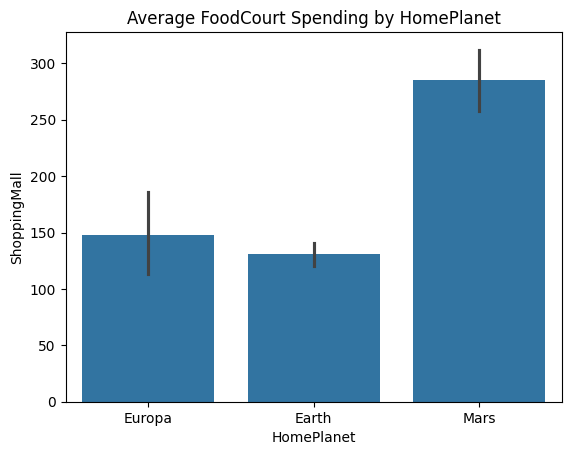

In [31]:
# Barplot Visualization
sns.barplot(x='HomePlanet', y='ShoppingMall', data=df_train)
plt.title('Average FoodCourt Spending by HomePlanet')
plt.show()

# Feature Engineering

In [29]:
df_train.drop(['Name', 'Cabin'], axis=1, inplace=True)
df_test.drop(['Name', 'Cabin'], axis=1, inplace=True)

In [32]:
df_train['Total_Spent'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['ShoppingMall'] + df_train['Spa'] + df_train['VRDeck']

df_test['Total_Spent'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck']

df_train['CryoSleep_VIP'] = df_train['CryoSleep'] * df_train['VIP']

df_test['CryoSleep_VIP'] = df_test['CryoSleep'] * df_test['VIP']

In [34]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_Spent,CryoSleep_VIP
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,0


In [35]:
categorical_columns = ['HomePlanet', 'VIP', 'Destination', 'CryoSleep', 'CryoSleep_VIP']

label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    
    df_train[col] = label_encoders[col].fit_transform(df_train[col].astype(str))

    # Transform the test data if the column exists
    if col in df_test.columns:
        df_test[col] = label_encoders[col].transform(df_test[col].astype(str))

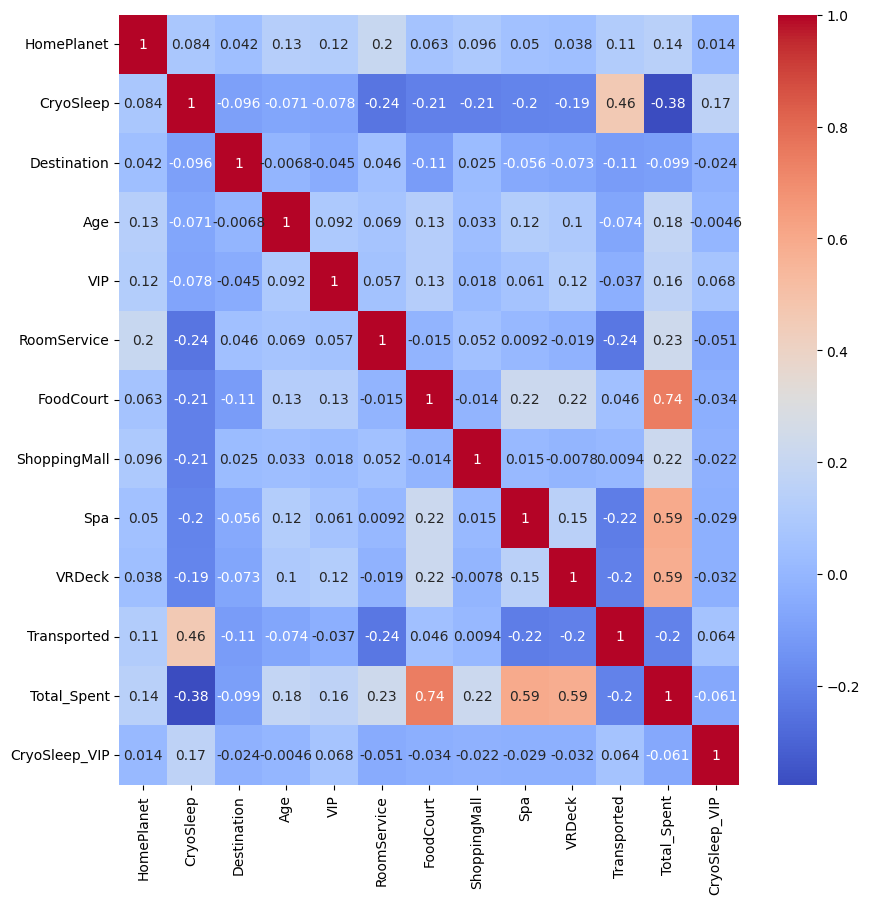

In [37]:
corr = df_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [38]:
# Separating the features (x) and target variable (y) from the training dataset
x = df_train.drop('Transported',axis=1)
y = df_train['Transported']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
x_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Spent,CryoSleep_VIP
PassengerId,,,,,,,,,,,,
2513_01,0,0,2,28.0,0,0.0,55.0,0.0,656.0,0.0,711.0,1
2774_02,0,0,2,17.0,0,0.0,1195.0,31.0,0.0,0.0,1226.0,1
8862_04,1,1,0,28.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
8736_02,2,0,2,20.0,0,0.0,2.0,289.0,976.0,0.0,1267.0,1
0539_02,1,1,0,36.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6076_01,0,0,2,18.0,0,14.0,2.0,144.0,610.0,0.0,770.0,1
5537_01,2,0,2,50.0,0,690.0,0.0,30.0,762.0,428.0,1910.0,0
5756_06,0,0,1,22.0,0,158.0,0.0,476.0,0.0,26.0,660.0,1


In [53]:
y_train

PassengerId
2513_01    False
2774_02    False
8862_04     True
8736_02     True
0539_02     True
           ...  
6076_01     True
5537_01    False
5756_06    False
0925_01    False
7775_01    False
Name: Transported, Length: 6954, dtype: bool

# Model Init

In [41]:
model = LogisticRegression(max_iter=1000, verbose=1)

In [44]:
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

for i in range(1, 101):  # 100 iterations
    model.fit(x_train, y_train)
    
    # Predict on training and testing sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Calculate log loss
    y_train_prob = model.predict_proba(x_train)
    y_test_prob = model.predict_proba(x_test)
    train_loss = log_loss(y_train, y_train_prob)
    test_loss = log_loss(y_test, y_test_prob)
    
    # Store accuracy and loss
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    # Print progress
    if i % 10 == 0:
        print(f"Iteration {i}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}, Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}")

Iteration 10: Train Accuracy = 0.7866, Test Accuracy = 0.7717, Train Loss = 0.4619, Test Loss = 0.4824
Iteration 20: Train Accuracy = 0.7866, Test Accuracy = 0.7717, Train Loss = 0.4619, Test Loss = 0.4824
Iteration 30: Train Accuracy = 0.7866, Test Accuracy = 0.7717, Train Loss = 0.4619, Test Loss = 0.4824
Iteration 40: Train Accuracy = 0.7866, Test Accuracy = 0.7717, Train Loss = 0.4619, Test Loss = 0.4824
Iteration 50: Train Accuracy = 0.7866, Test Accuracy = 0.7717, Train Loss = 0.4619, Test Loss = 0.4824
Iteration 60: Train Accuracy = 0.7866, Test Accuracy = 0.7717, Train Loss = 0.4619, Test Loss = 0.4824
Iteration 70: Train Accuracy = 0.7866, Test Accuracy = 0.7717, Train Loss = 0.4619, Test Loss = 0.4824
Iteration 80: Train Accuracy = 0.7866, Test Accuracy = 0.7717, Train Loss = 0.4619, Test Loss = 0.4824
Iteration 90: Train Accuracy = 0.7866, Test Accuracy = 0.7717, Train Loss = 0.4619, Test Loss = 0.4824
Iteration 100: Train Accuracy = 0.7866, Test Accuracy = 0.7717, Train Los

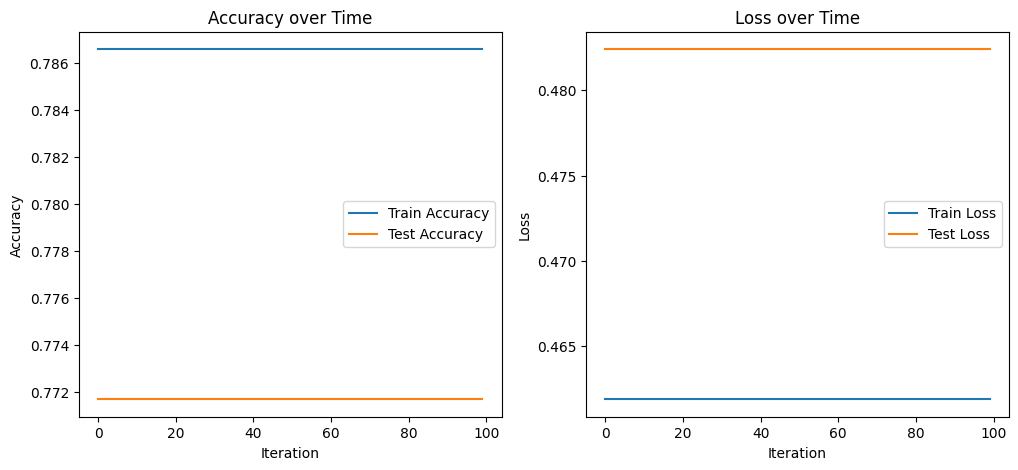

In [45]:
# Plot the accuracy and loss over time
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Time')
plt.legend()

plt.show()

In [46]:
# Final evaluation
final_train_accuracy = accuracy_score(y_train, model.predict(x_train))
final_test_accuracy = accuracy_score(y_test, model.predict(x_test))
final_train_loss = log_loss(y_train, model.predict_proba(x_train))
final_test_loss = log_loss(y_test, model.predict_proba(x_test))

print(f"Final Train Accuracy: {final_train_accuracy:.4f}")
print(f"Final Test Accuracy: {final_test_accuracy:.4f}")
print(f"Final Train Loss: {final_train_loss:.4f}")
print(f"Final Test Loss: {final_test_loss:.4f}")

Final Train Accuracy: 0.7866
Final Test Accuracy: 0.7717
Final Train Loss: 0.4619
Final Test Loss: 0.4824


# Finals

In [50]:
y_test_pred = model.predict(df_test)

In [52]:
submission = pd.DataFrame({
    'PassengerId': df_test.index,
    'Transported': y_test_pred
})

submission.to_csv('spaceship-titanic/submission.csv', index=False)

print('Submission saved')

Submission saved
